# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
# load imdb dataset as pandas dataframe
df = pd.read_csv('imdb_1000.csv')

In [3]:
# show first 5 rows of imdb_df
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [4]:
# load bikes dataset as pandas dataframe
bdf = pd.read_csv('bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bdf[:3]

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


In [5]:
# show first 3 rows of bikes_df
bdf.iloc[:3]

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [6]:
# list columns of imdb_df
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [7]:
# what are the datatypes of values in columns
df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [8]:
# list first 5 movie titles
d = df[['title']]
d.head()

,title
0,The Shawshank Redemption
1,The Godfather
2,The Godfather: Part II
3,The Dark Knight
4,Pulp Fiction


In [9]:
# show only movie title and genre
f = df[['title','genre']]
f

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [10]:
# show the type of duration column
df[['duration']]

,duration
0,142
1,175
2,200
3,152
4,154
...,...
974,116
975,118
976,138
977,114


In [11]:
# show duration values of movies as numpy arrays
np.array(df[['duration']])

array([[142],
       [175],
       [200],
       [152],
       [154],
       [ 96],
       [161],
       [201],
       [195],
       [139],
       [178],
       [148],
       [124],
       [142],
       [179],
       [169],
       [133],
       [207],
       [146],
       [121],
       [136],
       [130],
       [130],
       [106],
       [127],
       [116],
       [175],
       [118],
       [110],
       [ 87],
       [125],
       [112],
       [102],
       [107],
       [119],
       [ 87],
       [169],
       [115],
       [112],
       [109],
       [189],
       [110],
       [150],
       [165],
       [155],
       [137],
       [113],
       [165],
       [ 95],
       [151],
       [155],
       [153],
       [125],
       [130],
       [116],
       [ 89],
       [137],
       [117],
       [ 88],
       [165],
       [170],
       [ 89],
       [146],
       [ 99],
       [ 98],
       [116],
       [156],
       [122],
       [149],
       [134],
       [122],
      

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [12]:
# convert all the movie titles to uppercase
df['title'].apply(lambda x: x.upper())
bdf

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN
2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN
2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN


## Plotting a column

Use ``.plot()`` function!

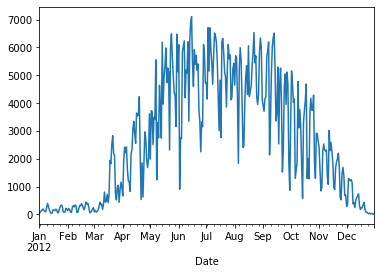

In [13]:
# plot the bikers travelling to Berri1 over the year
bdf['Berri1'].plot()

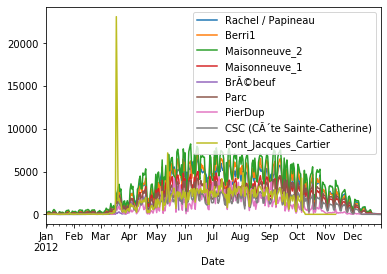

In [14]:
# plot all the columns of bikes_df
bdf.plot()

## Value counts

Get count of unique values in a particular column/Series.

In [15]:
# what are the unique genre in imdb_df?
df['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

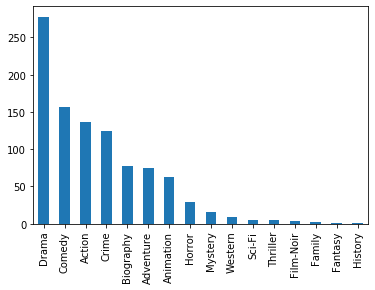

In [16]:
# plotting value counts of unique genres as a bar chart
pd.value_counts(df['genre']).plot(kind="bar")

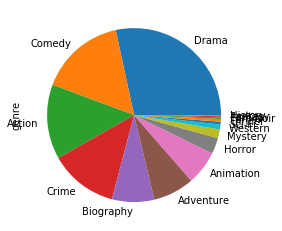

In [17]:
# plotting value counts of unique genres as a pie chart
pd.value_counts(df['genre']).plot(kind="pie")

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [18]:
# show index of bikes_df
for i in bdf.index:
    print (i, sep=" ")

2012-01-01 00:00:00
2012-01-02 00:00:00
2012-01-03 00:00:00
2012-01-04 00:00:00
2012-01-05 00:00:00
2012-01-06 00:00:00
2012-01-07 00:00:00
2012-01-08 00:00:00
2012-01-09 00:00:00
2012-01-10 00:00:00
2012-01-11 00:00:00
2012-01-12 00:00:00
2012-01-13 00:00:00
2012-01-14 00:00:00
2012-01-15 00:00:00
2012-01-16 00:00:00
2012-01-17 00:00:00
2012-01-18 00:00:00
2012-01-19 00:00:00
2012-01-20 00:00:00
2012-01-21 00:00:00
2012-01-22 00:00:00
2012-01-23 00:00:00
2012-01-24 00:00:00
2012-01-25 00:00:00
2012-01-26 00:00:00
2012-01-27 00:00:00
2012-01-28 00:00:00
2012-01-29 00:00:00
2012-01-30 00:00:00
2012-01-31 00:00:00
2012-02-01 00:00:00
2012-02-02 00:00:00
2012-02-03 00:00:00
2012-02-04 00:00:00
2012-02-05 00:00:00
2012-02-06 00:00:00
2012-02-07 00:00:00
2012-02-08 00:00:00
2012-02-09 00:00:00
2012-02-10 00:00:00
2012-02-11 00:00:00
2012-02-12 00:00:00
2012-02-13 00:00:00
2012-02-14 00:00:00
2012-02-15 00:00:00
2012-02-16 00:00:00
2012-02-17 00:00:00
2012-02-18 00:00:00
2012-02-19 00:00:00


In [19]:
# get row for date 2012-01-01
bdf.loc['2012-01-01']

Unnamed: 1                      00:00
Rachel / Papineau                  16
Berri1                             35
Maisonneuve_2                      51
Maisonneuve_1                      38
BrÃ©beuf                            5
Parc                               26
PierDup                            10
CSC (CÃ´te Sainte-Catherine)        0
Pont_Jacques_Cartier               27
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [20]:
# show 11th row of imdb_df using iloc
df.iloc[10]

star_rating                                                     8.8
title             The Lord of the Rings: The Fellowship of the Ring
content_rating                                                PG-13
genre                                                     Adventure
duration                                                        178
actors_list       [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
Name: 10, dtype: object

## Selecting rows where column has a particular value

In [21]:
# select only those movies where genre is adventure
df.loc[df.genre=="Adventure"]

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [22]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
d = df.loc[(df['star_rating']>8.0) & (df['duration']>130)]
p = pd.value_counts(d['genre']).idxmax()

## Adding a new column to DataFrame

In [23]:
# add a weekday column to bikes_df
bdf['weekday']=bdf.index.weekday
bdf

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,6
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0,3
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN,3
2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN,4
2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN,5


## Deleting an existing column from DataFrame

In [24]:
# remove column 'Unnamed: 1' from bikes_df
new_df = bdf.drop(['Unnamed: 1'], axis=1)

## Deleting a row in DataFrame

In [25]:
# remove row no. 1 from bikes_df
#df.index[0]
ndf = new_df.drop(new_df.index[0], axis = 0)
ndf

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3
2012-01-06,75,146,244,98,4.0,86,4,0,17.0,4
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,8,12,7,4,NaN,1,2,0,NaN,3
2012-12-28,0,35,3,38,NaN,0,0,0,NaN,4
2012-12-29,0,27,8,42,NaN,9,0,0,NaN,5


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [26]:
# group imdb_df by movie genres
p = df.groupby('genre')
p.first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [27]:
# get crime movies group
p.get_group('Crime')

,star_rating,title,content_rating,duration,actors_list
0,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...
927,7.5,Brick,R,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [28]:
# get mean of movie durations for each group
p = df.groupby('genre')
p['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [37]:
# change duration of all movies in a particular genre to mean duration of the group
df.loc[df['genre']=='Action','duration']=p['duration'].get_group('Action').mean()
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142.000000,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.000000,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.000000,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.000000,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116.000000,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118.000000,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114.000000,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [40]:
# drop groups/genres that do not have average movie duration greater than 120
df.drop(df[df.duration < 120].index, inplace=True)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142.000000,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.000000,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.000000,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.000000,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
967,7.4,The Rock,R,Action,126.485294,"[u'Sean Connery', u'Nicolas Cage', u'Ed Harris']"
968,7.4,The English Patient,R,Drama,162.000000,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
973,7.4,The Cider House Rules,PG-13,Drama,126.000000,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [53]:
# group weekday wise bikers count
grp = bdf.groupby('weekday')
grp.first()

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier
weekday,,,,,,,,,,
0,00:00,43,83,153,68,11.0,53,6,1,21.0
1,00:00,58,135,248,104,2.0,89,3,2,15.0
2,00:00,61,144,318,116,2.0,111,8,1,19.0
3,00:00,95,197,330,124,6.0,97,13,2,16.0
4,00:00,75,146,244,98,4.0,86,4,0,17.0
5,00:00,54,98,108,80,5.0,53,6,2,9.0
6,00:00,16,35,51,38,5.0,26,10,0,27.0


In [50]:
# get weekday wise biker count
bdf.groupby('weekday').agg(['count'])

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier
,count,count,count,count,count,count,count,count,count,count
weekday,,,,,,,,,,
0,53,53,53,53,53,21,53,53,53,46
1,52,52,52,52,52,21,52,52,52,45
2,52,52,52,52,52,21,52,52,52,45
3,52,52,52,52,52,21,52,52,52,45
4,52,52,52,52,52,21,52,52,52,45
5,52,52,52,52,52,20,52,52,52,45
6,53,53,53,53,53,21,53,53,53,46


weekday
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Berri1, dtype: object

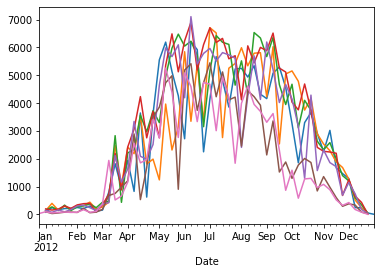

In [58]:
# plot weekday wise biker count for 'Berri1'
grp['Berri1'].plot()

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)